# <center>ML Dataset Pipline Project</center>

<p style:

In [1]:
# Importing all the necessary modules

In [4]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [5]:
# the main aim is to understand the variation of life expectancy based on various parameters collected in the data

## DATA ANALYSIS

#### 1. Exploration

In [6]:
df = pd.read_csv("Life Expectancy Data.csv")
df2 = pd.read_csv("Life Expectancy Data.csv")
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [7]:
# I want to create a life_expectancy encoder function that can create a range of values for different life expectancies
def life_expectancy_encoder(x:np.float64):
    if 35 <= x < 40:
        return 1
    elif 40 <= x < 45:
        return 2
    elif 45 <= x < 50:
        return 3
    elif 50 <= x < 55:
        return 4
    elif 55 <= x < 60:
        return 5
    elif 60 <= x < 65:
        return 6
    elif 65 <= x < 70:
        return 7
    elif 70 <= x < 75:
        return 8
    elif 75 <= x < 80:
        return 9
    elif 80 <= x < 85:
        return 10
    elif 85 <= x < 90:
        return 11

In [8]:
# Here I am trying to convert float values to int so that I  can apply classification models
df["Life expectancy"] = df["Life expectancy"].apply(life_expectancy_encoder)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing              7.0            263.0   
1  Afghanistan  2014  Developing              5.0            271.0   
2  Afghanistan  2013  Developing              5.0            268.0   
3  Afghanistan  2012  Developing              5.0            272.0   
4  Afghanistan  2011  Developing              5.0            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [11]:
# checking the null values of Life expectancy and deleting them
bool1 = pd.isnull(df['Life expectancy'])
df[bool1]
df = df.dropna(subset=['Life expectancy'])

In [12]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000         7.314549       164.796448      30.407445   
std       4.61056         1.921175       124.292079     118.114450   
min    2000.00000         1.000000         1.000000       0.000000   
25%    2003.75000         6.000000        74.000000       0.000000   
50%    2007.50000         8.000000       144.000000       3.000000   
75%    2011.25000         9.000000       228.000000      22.000000   
max    2015.00000        11.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2735.000000             2928.000000  2375.000000    2928.000000   
mean      4.614856              740.321185    80.960842    2427.855874   
std       4.050749             1990.930605    25.018337   11485.970937   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.905000                4.853964    77.000000       0.000000   
50%       3.770000               65.611455    92.000000      17.000000   
75%       7.715000              442.614322    97.000000     362.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths         Polio  Total expenditure  \
count  2896.000000         2928.000000  2909.000000        2702.000000   
mean     38.235394           42.179303    82.548298           5.930163   
std      19.959590          160.700547    23.416674           2.483273   
min       1.000000            0.000000     3.000000           0.370000   
25%      19.300000            0.000000    78.000000           4.260000   
50%      43.350000            4.000000    93.000000           5.750000   
75%      56.100000           28.000000    97.000000           7.490000   
max      77.600000         2500.000000    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2909.000000  2928.000000    2485.000000  2.284000e+03   
mean     82.321416     1.747712    7494.210719  1.276454e+07   
std      23.706644     5.085542   14282.251492  6.103765e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.852618  1.966738e+05   
50%      93.000000     0.100000    1764.973870  1.391756e+06   
75%      97.000000     0.800000    5932.899677  7.426746e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2896.000000         2896.000000   
mean               4.850622            4.881423   
std                4.420829            4.509609   
min                0.100000            0.100000   
25%                1.600000            1.575000   
50%                3.300000            3.400000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2768.000000  2768.000000  
mean                          0.627419    11.999639  
std                           0.210978     3.346440  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779250    14.300000  
max                           0.948000    20.700000

#### 2. Cleaning

In [10]:
# we are using the analysis to find out the best strategies for data cleaning and 

In [11]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

Except population, the other null values can be easily filled with the mean fill as observed in the exploration of the data. So we can replace these values with their mean values without affecting the properties of the dataset much. 

For handling the population, if we look at the missing values individually and compare them with the
sources at wikipedia, we find that most values are comparable to bottom 25 percent mean of the data.

#### 3. Plotting

<AxesSubplot:>

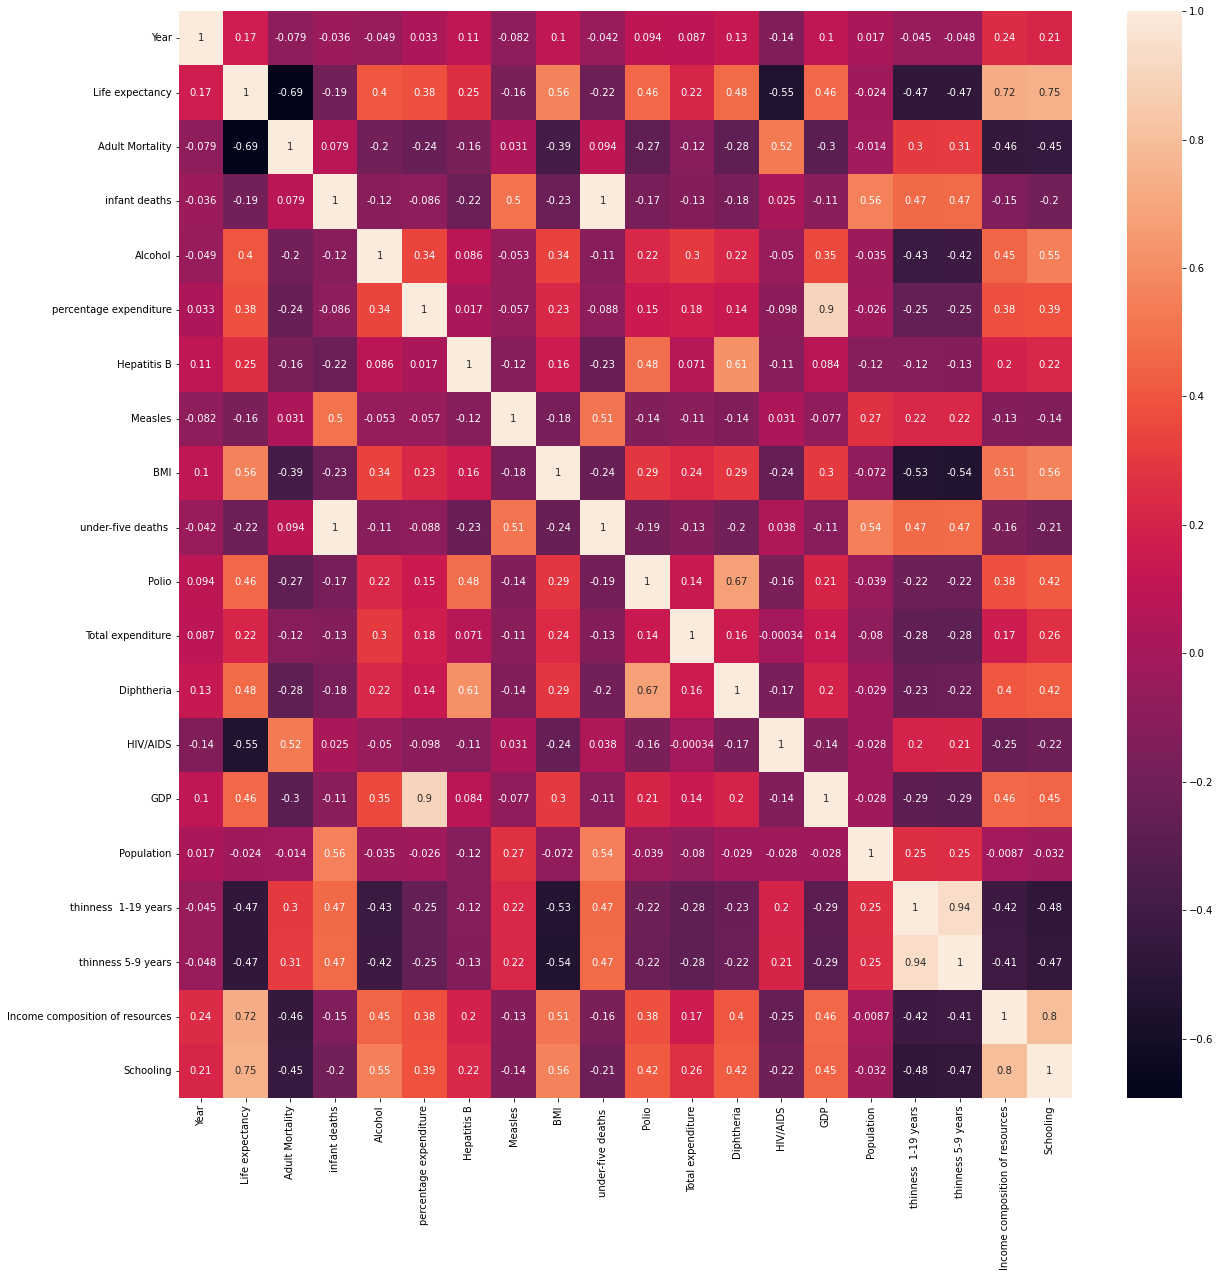

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [82]:
# subplots

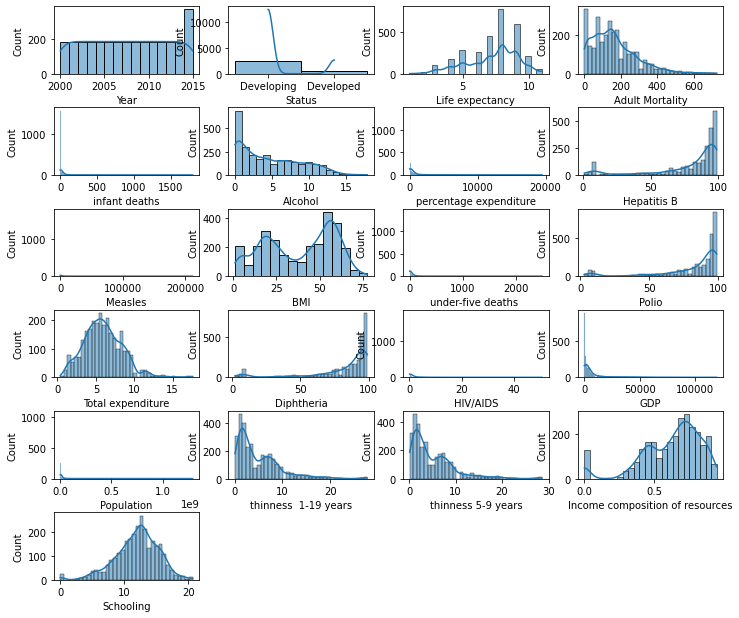

In [83]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.drop("Country", axis=1).columns:
    plt.subplot(10,4, i)
    sns.histplot(data=df, x=col_name, kde=True,  multiple='layer', alpha=0.5, palette='viridis')
    i += 1

In [84]:
# Box-plots

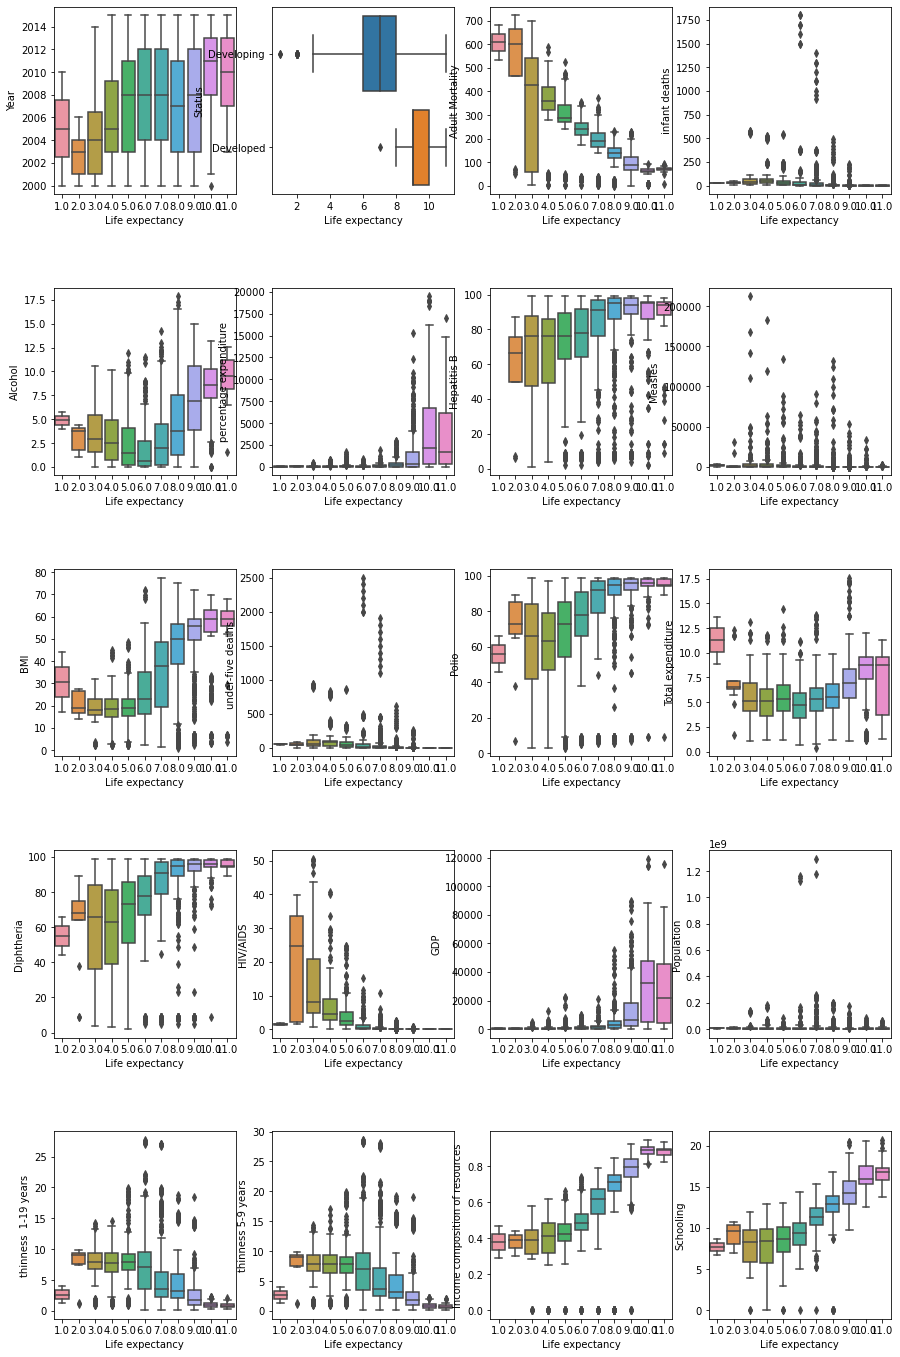

In [85]:
plt.figure(figsize=(15,50))
plt.subplots_adjust(hspace=0.5)
i=1
for col_name in df.drop(columns=['Life expectancy', "Country"],axis=1).columns:
    plt.subplot(10,4, i)
    sns.boxplot(data=df, x='Life expectancy', y=col_name)
    i+=1

In [86]:
# pair-plots

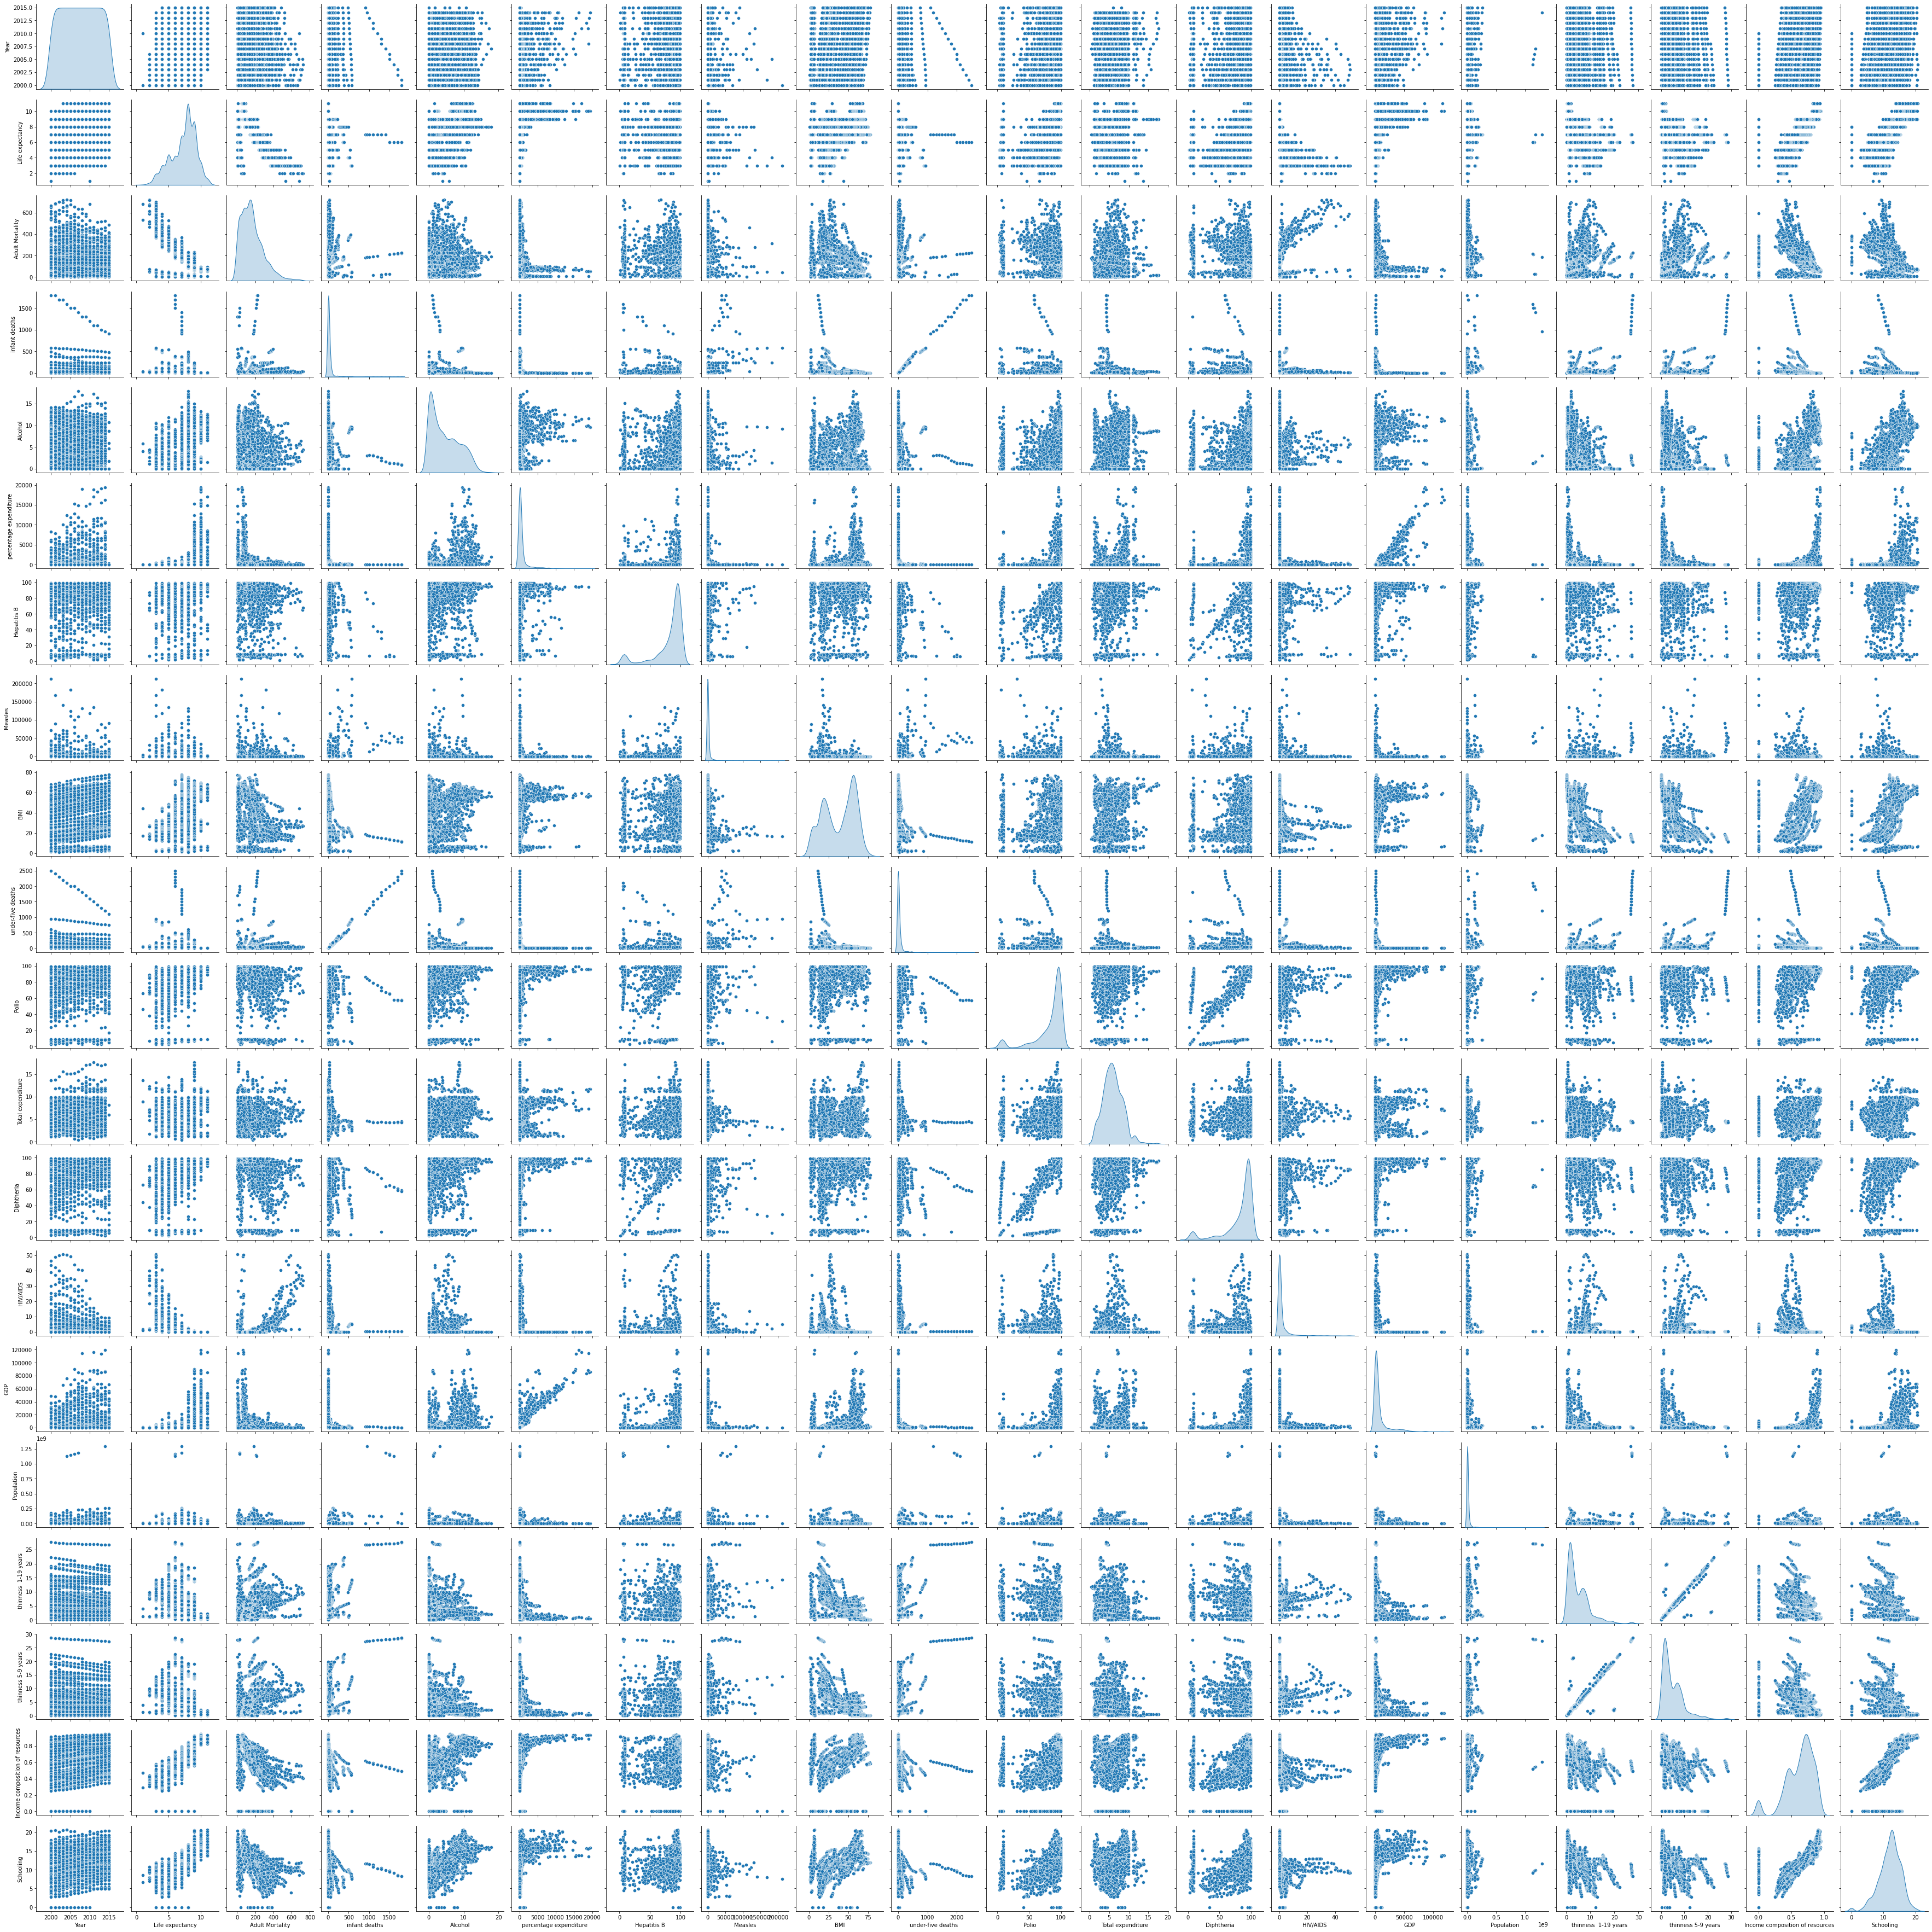

In [87]:
sns.pairplot(df,diag_kind = 'kde',kind = 'scatter',palette = 'husl')

### 1. OUTLIERS

In [12]:
# using k-score method

iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()


Number of outliers


Adult Mortality                     82
Alcohol                              0
BMI                                  0
Country                              0
Diphtheria                         297
GDP                                363
HIV/AIDS                           542
Hepatitis B                        252
Income composition of resources    130
Life expectancy                      2
Measles                            542
Polio                              278
Population                         294
Schooling                           42
Status                               0
Total expenditure                   30
Year                                 0
infant deaths                      315
percentage expenditure             388
thinness  1-19 years                89
thinness 5-9 years                  97
under-five deaths                  394
dtype: int64

In [13]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()


Number of outliers


Adult Mortality                      5
Alcohol                              0
BMI                                  0
Country                              0
Diphtheria                         171
GDP                                266
HIV/AIDS                           403
Hepatitis B                        168
Income composition of resources      0
Life expectancy                      0
Measles                            447
Polio                              172
Population                         202
Schooling                            0
Status                               0
Total expenditure                    3
Year                                 0
infant deaths                      158
percentage expenditure             300
thinness  1-19 years                16
thinness 5-9 years                  16
under-five deaths                  195
dtype: int64

#### Observation
There are extreme outliers in the data.

###  2. Imputing and Encoding

Label Encoding

In [13]:
# Label encoding for status of countries
# Label Encoding on the Package attribute
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
df['Status'] = labelencoder.fit_transform(df['Status'])
# reverse function because it assigned opposite value to "developing" and "developed"
def reverse(x):
    if x == 0:
        return 1
    elif x == 1:
        return 0
df["Status"] = df['Status'].apply(reverse)
df.describe()

Year       Status  Life expectancy  Adult Mortality  \
count  2928.00000  2928.000000      2928.000000      2928.000000   
mean   2007.50000     0.174863         7.314549       164.796448   
std       4.61056     0.379915         1.921175       124.292079   
min    2000.00000     0.000000         1.000000         1.000000   
25%    2003.75000     0.000000         6.000000        74.000000   
50%    2007.50000     0.000000         8.000000       144.000000   
75%    2011.25000     0.000000         9.000000       228.000000   
max    2015.00000     1.000000        11.000000       723.000000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2928.000000  2735.000000             2928.000000  2375.000000   
mean       30.407445     4.614856              740.321185    80.960842   
std       118.114450     4.050749             1990.930605    25.018337   
min         0.000000     0.010000                0.000000     1.000000   
25%         0.000000     0.905000                4.853964    77.000000   
50%         3.000000     3.770000               65.611455    92.000000   
75%        22.000000     7.715000              442.614322    97.000000   
max      1800.000000    17.870000            19479.911610    99.000000   

             Measles          BMI  ...        Polio  Total expenditure  \
count    2928.000000  2896.000000  ...  2909.000000        2702.000000   
mean     2427.855874    38.235394  ...    82.548298           5.930163   
std     11485.970937    19.959590  ...    23.416674           2.483273   
min         0.000000     1.000000  ...     3.000000           0.370000   
25%         0.000000    19.300000  ...    78.000000           4.260000   
50%        17.000000    43.350000  ...    93.000000           5.750000   
75%       362.250000    56.100000  ...    97.000000           7.490000   
max    212183.000000    77.600000  ...    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2909.000000  2928.000000    2485.000000  2.284000e+03   
mean     82.321416     1.747712    7494.210719  1.276454e+07   
std      23.706644     5.085542   14282.251492  6.103765e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.852618  1.966738e+05   
50%      93.000000     0.100000    1764.973870  1.391756e+06   
75%      97.000000     0.800000    5932.899677  7.426746e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2896.000000         2896.000000   
mean               4.850622            4.881423   
std                4.420829            4.509609   
min                0.100000            0.100000   
25%                1.600000            1.575000   
50%                3.300000            3.400000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2768.000000  2768.000000  
mean                          0.627419    11.999639  
std                           0.210978     3.346440  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779250    14.300000  
max                           0.948000    20.700000  

[8 rows x 21 columns]

Imputation of dataset with median as there are outliers (using sklearn)

In [14]:
df = df.drop('Country', axis = 1)

In [15]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')

cols_nan = df.columns[df.isnull().sum() > 0]
simple_imputer.fit(df)
df[cols_nan] = simple_imputer.fit_transform(df[cols_nan])

In [16]:
df.describe()

Year       Status  Life expectancy  Adult Mortality  \
count  2928.00000  2928.000000      2928.000000      2928.000000   
mean   2007.50000     0.174863         7.314549       164.796448   
std       4.61056     0.379915         1.921175       124.292079   
min    2000.00000     0.000000         1.000000         1.000000   
25%    2003.75000     0.000000         6.000000        74.000000   
50%    2007.50000     0.000000         8.000000       144.000000   
75%    2011.25000     0.000000         9.000000       228.000000   
max    2015.00000     1.000000        11.000000       723.000000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2928.000000  2928.000000             2928.000000  2928.000000   
mean       30.407445     4.559167              740.321185    83.045765   
std       118.114450     3.920534             1990.930605    22.942047   
min         0.000000     0.010000                0.000000     1.000000   
25%         0.000000     1.107500                4.853964    82.000000   
50%         3.000000     3.770000               65.611455    92.000000   
75%        22.000000     7.400000              442.614322    96.000000   
max      1800.000000    17.870000            19479.911610    99.000000   

             Measles          BMI  ...        Polio  Total expenditure  \
count    2928.000000  2928.000000  ...  2928.000000        2928.000000   
mean     2427.855874    38.291291  ...    82.616120           5.916257   
std     11485.970937    19.857308  ...    23.355634           2.385963   
min         0.000000     1.000000  ...     3.000000           0.370000   
25%         0.000000    19.400000  ...    78.000000           4.370000   
50%        17.000000    43.350000  ...    93.000000           5.750000   
75%       362.250000    56.100000  ...    97.000000           7.330000   
max    212183.000000    77.600000  ...    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2928.000000  2928.000000    2928.000000  2.928000e+03   
mean     82.390710     1.747712    6627.389707  1.026315e+07   
std      23.645132     5.085542   13316.392534  5.411179e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     578.797095  4.181205e+05   
50%      93.000000     0.100000    1764.973870  1.391756e+06   
75%      97.000000     0.800000    4793.630903  4.592777e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2928.000000         2928.000000   
mean               4.833675            4.865232   
std                4.399553            4.487535   
min                0.100000            0.100000   
25%                1.600000            1.600000   
50%                3.300000            3.400000   
75%                7.100000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2928.000000  2928.000000  
mean                          0.630128    12.016052  
std                           0.205440     3.254407  
min                           0.000000     0.000000  
25%                           0.504000    10.300000  
50%                           0.677000    12.300000  
75%                           0.773000    14.100000  
max                           0.948000    20.700000  

[8 rows x 21 columns]

In [17]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Step 3: Skewness

In [18]:
from scipy.stats import skew
print("Skewness scores for all columns:")
for column in df.columns:
    print(f"{column} : {skew(df[column])}")

Skewness scores for all columns:
Year : 0.0
Status : 1.7119201295040969
Life expectancy : -0.5831213478498636
Adult Mortality : 1.1737677783478573
infant deaths : 9.76603812253009
Alcohol : 0.6466703106310748
percentage expenditure : 4.641410342759306
Hepatitis B : -2.284973570461719
Measles : 9.420460826099431
BMI : -0.23971910667965995
under-five deaths  : 9.474765867686411
Polio : -2.107769996031328
Total expenditure : 0.6176441597195285
Diphtheria : -2.0823822675413703
HIV/AIDS : 5.383863232953203
GDP : 3.53481832110617
Population : 17.93410673106506
thinness  1-19 years : 1.726776343796342
thinness 5-9 years : 1.7927308282857028
Income composition of resources : -1.207559460531355
Schooling : -0.6148905912988316


We need to deal with highly skewed values so that they can have more normal distribution and can be used in data better.

#### Observations:
We can observe that infant deaths, percentage expenditure, Measles, under-five deaths, Population have very high skew values and should be changed so that they have a low skew value.

1. Measles

In [19]:
# changing the value of Measles to logarithmic distrubution
from scipy import stats
Measles_sqrt = np.sqrt(np.sqrt(df["Measles"]))
print(skew(Measles_sqrt))

1.6561555811958864


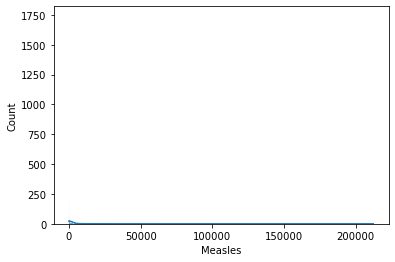

In [20]:
sns.histplot(data=df, x='Measles', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["Measles"] = Measles_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='Measles', ylabel='Count'>

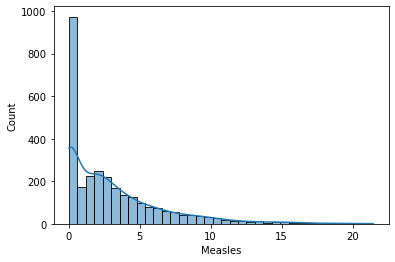

In [21]:
sns.histplot(data=df, x='Measles', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

2. Percentage Expenditure

In [22]:
percentage_sqrt = np.sqrt(np.sqrt(df["percentage expenditure"]))
print(skew(percentage_sqrt))

0.7288028287481862


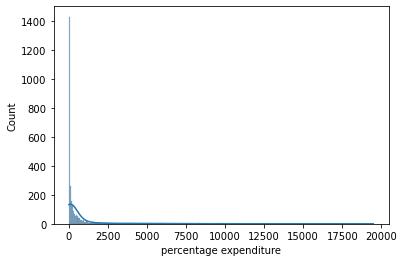

In [23]:
sns.histplot(data=df, x='percentage expenditure', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["percentage expenditure"] = percentage_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='percentage expenditure', ylabel='Count'>

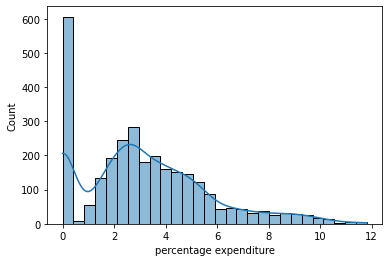

In [24]:
sns.histplot(data=df, x='percentage expenditure', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

3.  Under-five Deaths

0.7259861712507906


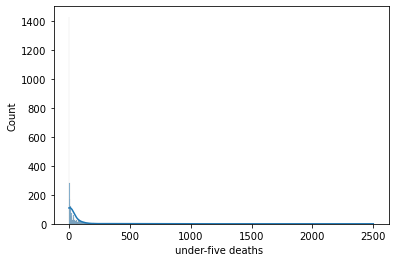

In [25]:
under_five_deaths_sqrt = np.sqrt(np.sqrt(df["under-five deaths "]))
print(skew(under_five_deaths_sqrt))
sns.histplot(data=df, x='under-five deaths ', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["under-five deaths "] = under_five_deaths_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='under-five deaths ', ylabel='Count'>

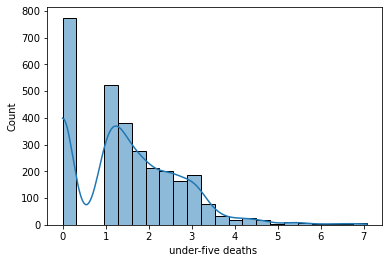

In [26]:
sns.histplot(data=df, x='under-five deaths ', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

4. Population 

0.47304224720649046


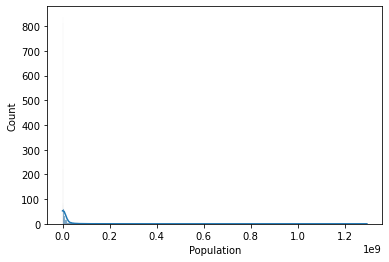

In [27]:
population_sqrt = np.sqrt(np.sqrt(np.sqrt(df["Population"])))
print(skew(population_sqrt))
sns.histplot(data=df, x='Population', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["Population"] = population_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='Population', ylabel='Count'>

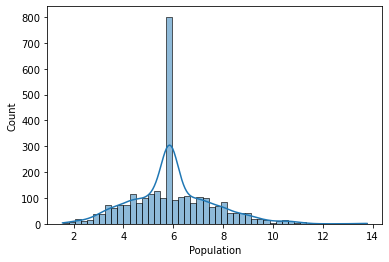

In [28]:
sns.histplot(data=df, x='Population', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

5. Infant Deaths

0.6775505626918777


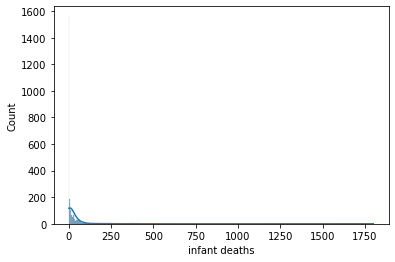

In [29]:
infant_deaths_sqrt = np.sqrt(np.sqrt(df["infant deaths"]))
print(skew(infant_deaths_sqrt))
sns.histplot(data=df, x='infant deaths', kde=True,  multiple='layer', alpha=0.5, palette='viridis')
df["infant deaths"] = infant_deaths_sqrt # to increase the normal characteristics in the distribution

<AxesSubplot:xlabel='infant deaths', ylabel='Count'>

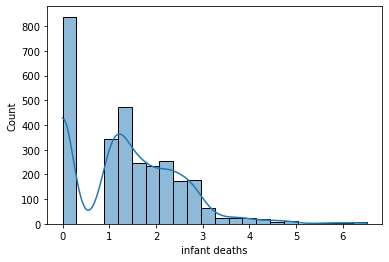

In [30]:
sns.histplot(data=df, x='infant deaths', kde=True,  multiple='layer', alpha=0.5, palette='viridis')

Skewness reduced quite a bit. Transforming skewed data is one critical step during the data cleaning process. 

### Step 4: Feature Selection

#### Pearson's Correlation Test

Life expectancy                    1.000000
Schooling                          0.713366
Income composition of resources    0.686721
BMI                                0.550037
Status                             0.479763
Diphtheria                         0.470304
Polio                              0.457399
GDP                                0.430267
percentage expenditure             0.422118
Alcohol                            0.388562
Total expenditure                  0.206488
Year                               0.172777
Hepatitis B                        0.170513
Population                        -0.085349
Measles                           -0.316564
thinness 5-9 years                -0.459748
thinness  1-19 years              -0.463883
HIV/AIDS                          -0.545348
infant deaths                     -0.558465
under-five deaths                 -0.583821
Adult Mortality                   -0.693116
Name: Life expectancy, dtype: float64

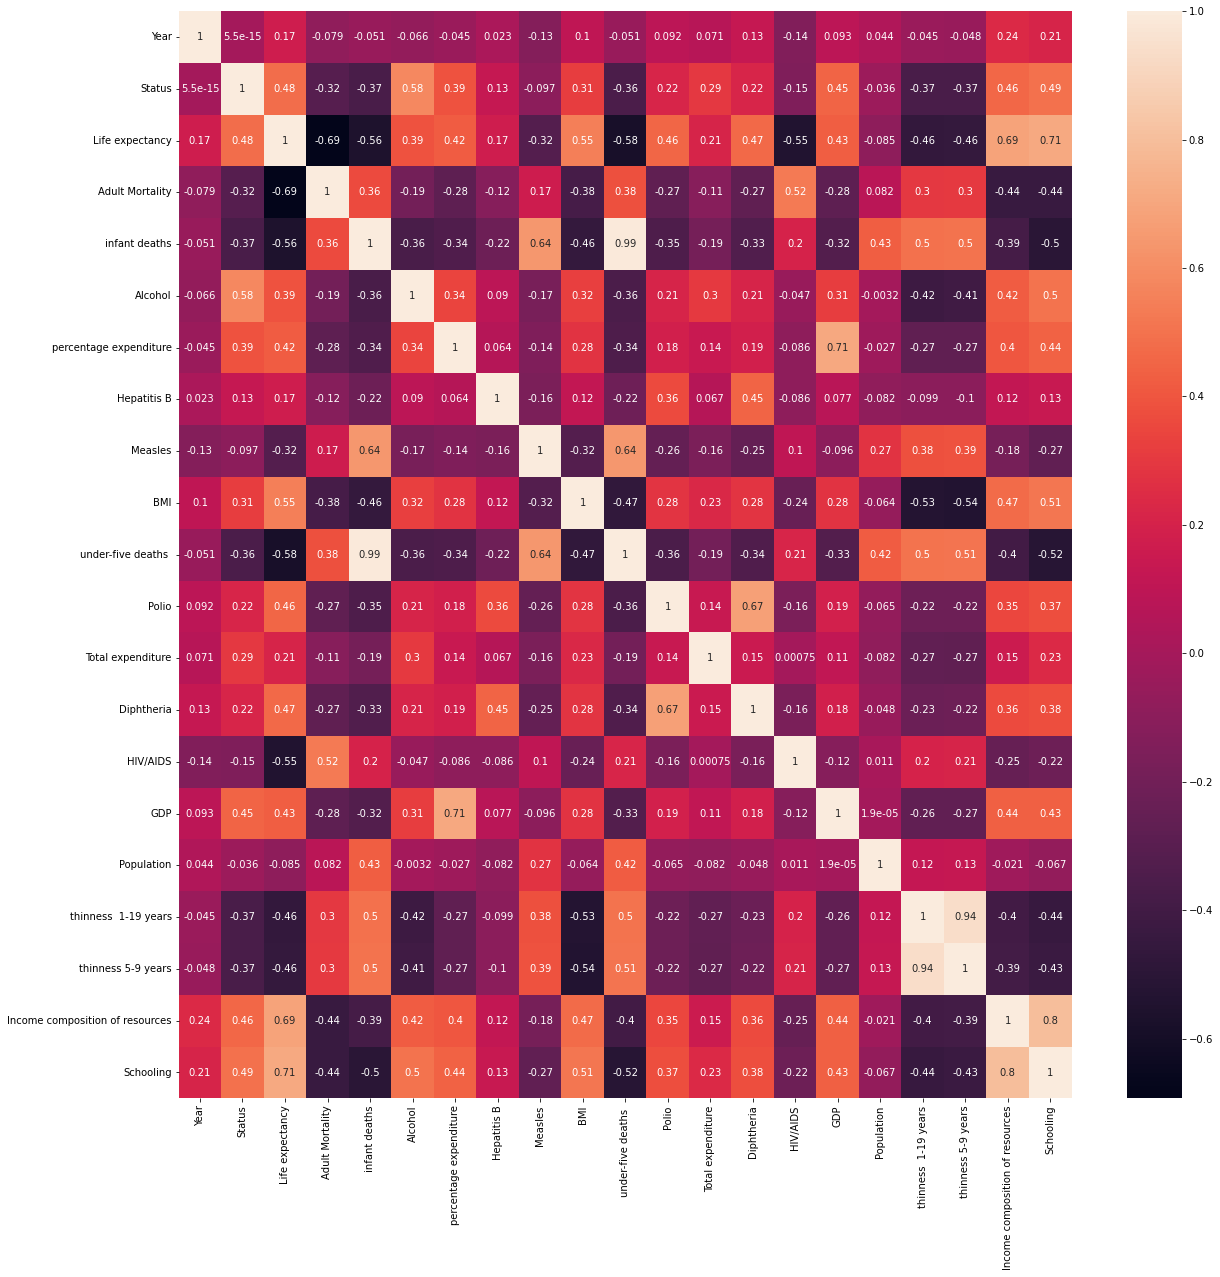

In [32]:
# Heatmap after all changes in the data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
df.corr()['Life expectancy'].sort_values(ascending=False)

<u>Observations:</u>

The following data points have a very high correlation:
<ol>
    <li>Under five deaths & Infant deaths (0.99) </li>
    <li>GDP & percentage expenditure (0.7) </li>
    <li>Dipteria & Polio (0.67) </li>
    <li>Thinness 5-9 years & Thinness 1-19 years (0.94) </li>
    <li>Income compostion of resources & Schooling (0.8) </li>
</ol>

#### Information gain

The feature scores generated using Information Gain method are: 
Feature Adult Mortality: 1.069873
Feature Income composition of resources: 0.767057
Feature Schooling: 0.595301
Feature thinness 5-9 years: 0.547763
Feature thinness  1-19 years: 0.531450
Feature HIV/AIDS: 0.493738
Feature under-five deaths : 0.434579
Feature BMI: 0.409843
Feature infant deaths: 0.403984
Feature GDP: 0.312891
Feature percentage expenditure: 0.275343
Feature Polio: 0.271227
Feature Diphtheria: 0.270012
Feature Alcohol: 0.246410
Feature Population: 0.190432
Feature Status: 0.183169
Feature Total expenditure: 0.177825
Feature Hepatitis B: 0.152720
Feature Measles: 0.125435
Feature Year: 0.026103


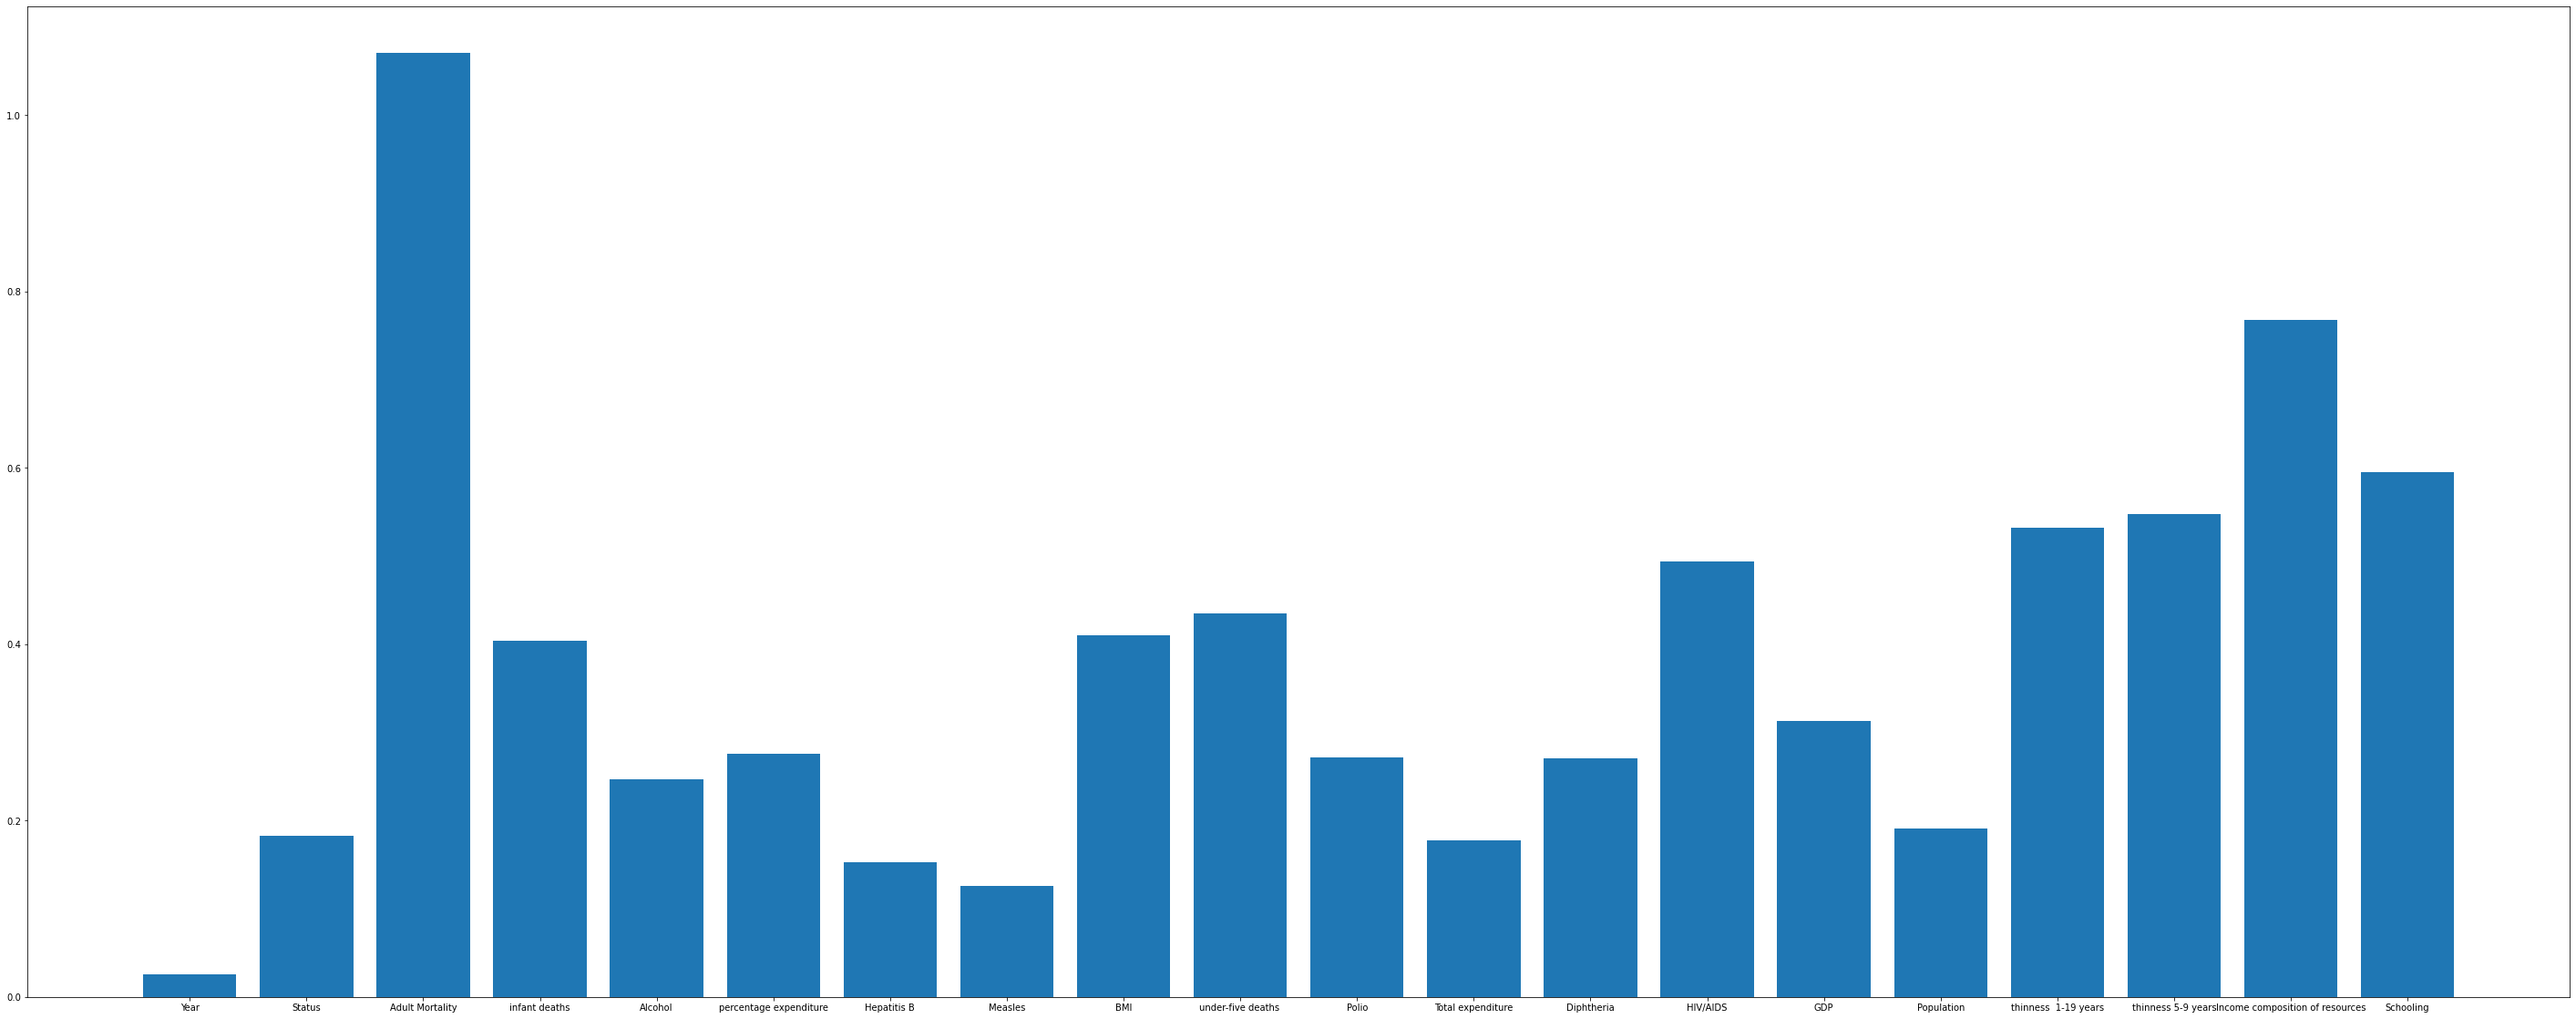

In [33]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
import matplotlib as plt

X = df.drop(columns = ["Life expectancy"], axis = 1) #feature matrix
y = df["Life expectancy"] #target

fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using Information Gain method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show()

#### ANOVA Feature Test

Now we are going to conduct ANOVA method test to find best features for the dataset.

The feature scores generated using ANVOA method are: 
Feature Schooling: 353.353259
Feature Income composition of resources: 292.071715
Feature Adult Mortality: 284.449572
Feature HIV/AIDS: 248.583912
Feature Status: 181.341423
Feature under-five deaths : 163.179518
Feature GDP: 147.862552
Feature BMI: 143.140520
Feature infant deaths: 143.081084
Feature thinness  1-19 years: 98.180917
Feature thinness 5-9 years: 97.916817
Feature percentage expenditure: 95.201381
Feature Diphtheria: 91.725845
Feature Polio: 86.281612
Feature Alcohol: 84.237476
Feature Measles: 43.464960
Feature Total expenditure: 31.923886
Feature Year: 20.139886
Feature Hepatitis B: 14.177370
Feature Population: 4.063755


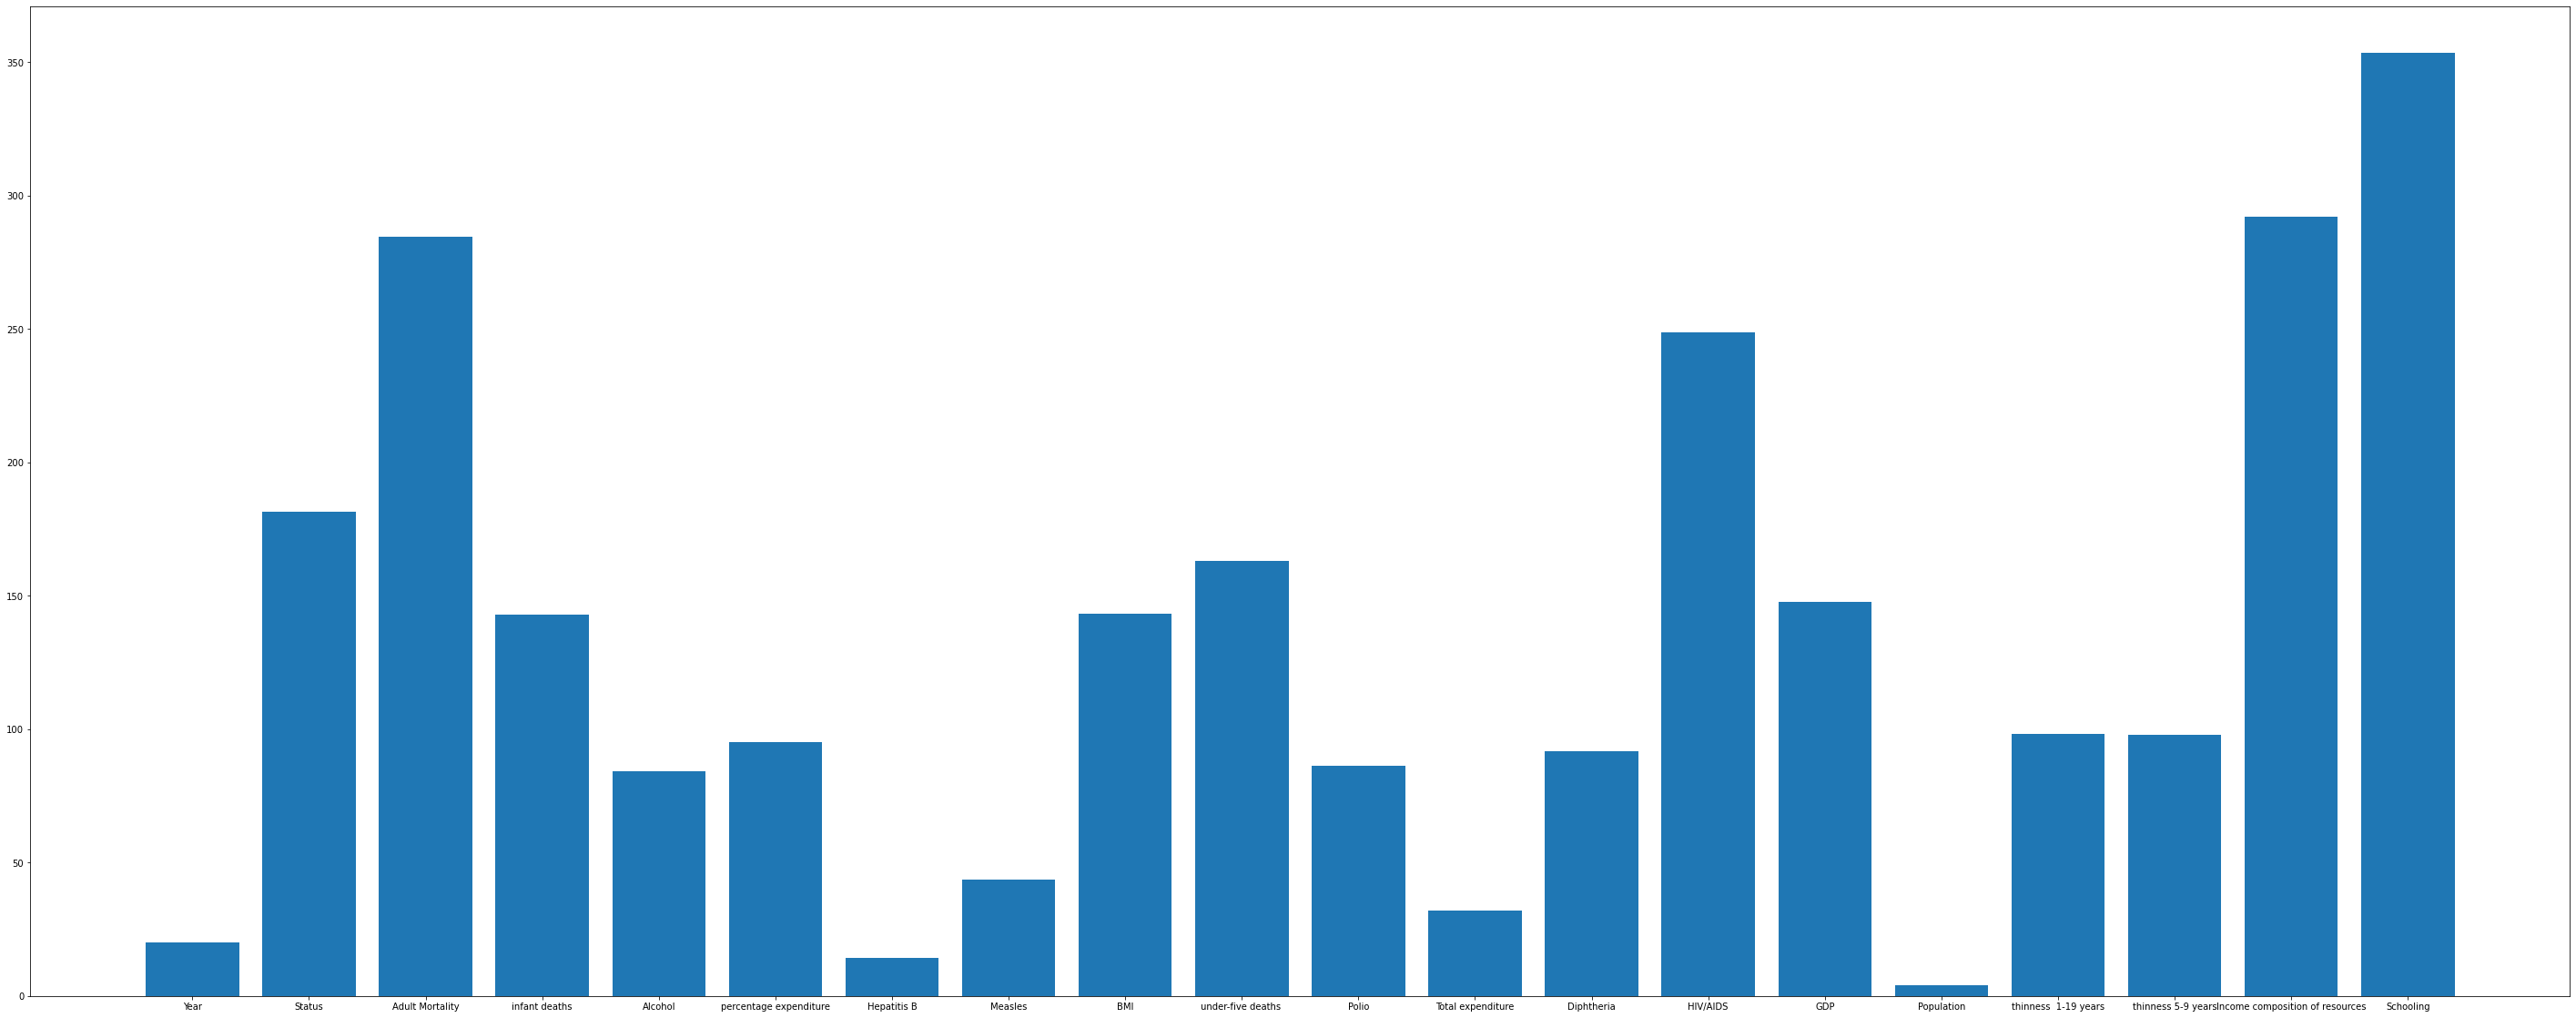

In [34]:
# feature extraction using ANOVA or univariate Statistical tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# specify features
X = df.drop(columns = ["Life expectancy"], axis = 1) #feature matrix
y = df["Life expectancy"] #target

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using ANVOA method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show()

#### <u>Based on the above three tests I am selecting the following features for modelling of the data:</u>
<ul>
    <li>Schooling</li>
    <li>HIV/AIDS</li>
    <li>Income composition of resources</li>
    <li>Adult Mortality</li>
    <li>Status</li>
    <li>Under 5 deaths</li>
    <li>GDP</li>
    <li>BMI</li>
    <li>thinness 1-19 years</li>
    <li>Alcohol</li>
    <li>Diptheria</li>
    <li>Measles</li>
    <li>Total expenditure</li>
    <li>Year</li>
</ul>

In [33]:
selected_features = ["Year","Status","Adult Mortality","Alcohol","Measles","BMI","under-five deaths " ,"Total expenditure","Diphtheria","HIV/AIDS","GDP","thinness  1-19 years","Income composition of resources","Schooling"]

# Modelling

### 1. No Free Lunch

In [34]:
from sklearn.model_selection import train_test_split
X = df[selected_features]
Y = df['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

In [35]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler

# Standard Scalar
sscaler = StandardScaler()
X_train_ss = sscaler.fit_transform(X_train)
X_test_ss = sscaler.transform(X_test)

# Quantile Transformer
qscaler = QuantileTransformer(n_quantiles=100, random_state=43, output_distribution='normal')
X_train_qf = qscaler.fit_transform(X_train)
X_test_qf = qscaler.transform(X_test)

# Robust Scalar
rscaler = RobustScaler(with_scaling=True)
X_train_rs = rscaler.fit_transform(X_train)
X_test_rs = rscaler.transform(X_test)

In [36]:
# modules pick up
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# metric
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
# with Standard Scalar
# variable name with different types of standardisation

models = []
models.append(('Logistic Regression', LogisticRegression(random_state=53)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K Nearest Neighbour', KNeighborsClassifier()))
models.append(('Decision Tree', tree.DecisionTreeClassifier(random_state=53)))
models.append(('Random Forest', RandomForestClassifier(random_state=53)))
models.append(('SVC', SVC(probability=True, random_state= 53)))
models.append(("LightGBM", LGBMClassifier(random_state = 53)))

# empty data frame
model_name = []
ss_score = []
qt_score = []
rs_score = []

for name, model in models:
    model_name.append(name)
    cv = cross_val_score(model, X_train_ss, y_train, cv = 5, scoring= "accuracy")
    ss_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_qf, y_train, cv = 5, scoring= "accuracy")
    qt_score.append(np.mean(cv))
    cv = cross_val_score(model, X_train_rs, y_train, cv = 5, scoring= "accuracy")
    rs_score.append(np.mean(cv))


model_score = pd.DataFrame(zip(model_name,ss_score, qt_score, rs_score) , columns=['Name', 'Standard Scalar', 'Quantile Transformer', 'Robust Scalar'])

model_score

Name  Standard Scalar  Quantile Transformer  Robust Scalar
0  Logistic Regression         0.544422              0.509392       0.537582
1          Naive Bayes         0.328364              0.239523       0.360378
2  K Nearest Neighbour         0.646889              0.567056       0.637077
3        Decision Tree         0.716508              0.715228       0.716935
4        Random Forest         0.825800              0.822813       0.825800
5                  SVC         0.644336              0.515382       0.523914
6             LightGBM         0.827508              0.829647       0.828793

### Step 2: Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def get_best_param_score(classifier):
    print(classifier.estimator)
    print(classifier.best_score_)
    print(classifier.best_params_)

In [39]:
# Instaniate Random Forest classifier
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [10, 50, 100, 500, 1000],
                                  'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}

# Randomized search to find approximate good parameters to reduce computation time
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid, cv = 5)
best_clf_rf = clf_rf.fit(X_train_ss,y_train)
get_best_param_score(best_clf_rf)

RandomForestClassifier(random_state=1)
0.8048849160789459
{'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': False}


### Step 3. Model Analysis

In [40]:
# Parameters for exhaustive search
param_grid =  {'n_estimators': [70,100,130],
            'criterion':['entropy'],
            'bootstrap': [True],
            'max_depth': [10, 20, 30, 50],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [3,4,5],
            'min_samples_split': [4,5,6]}

# parameter search
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True)
best_clf_rf = clf_rf.fit(X_train_ss,y_train)
get_best_param_score(best_clf_rf)

# Fit with best parameter and predict with test
best_svc = best_clf_rf.best_estimator_.fit(X_train_ss, y_train)
y_pred = best_svc.predict(X_test_ss)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
RandomForestClassifier(random_state=1)
0.8023153463451971
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
[[  0   1   0   0   0   0   0   0   0   0]
 [  0  12   5   1   0   0   0   0   0   0]
 [  0   2  21   7   0   0   0   0   0   0]
 [  0   1   6  53   1   0   1   0   0   0]
 [  0   0   0   3  39   5   0   0   0   0]
 [  0   0   0   1   0  79   5   1   0   0]
 [  0   0   0   0   0   4 152   5   0   0]
 [  0   0   0   0   0   0  20 102   3   0]
 [  0   0   0   0   0   0   0   5  40   1]
 [  0   0   0   0   0   0   0   1   9   0]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.75      0.67      0.71        18
         4.0       0.66      0.70      0.68        30
         5.0       0.82      0.85      0.83        62
         6.0       0.97

### Confusion Matrix

<AxesSubplot:>

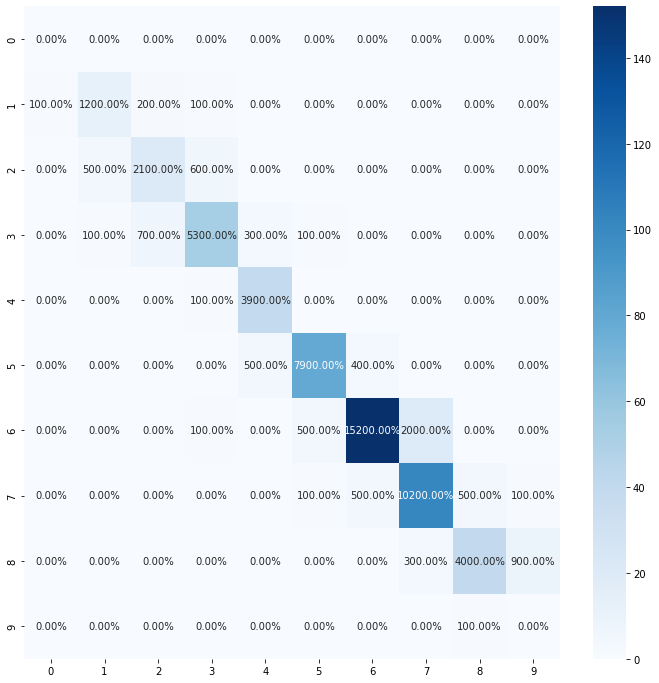

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = selected_features
cm = confusion_matrix(y_pred, y_test)

# then print it in a pretty way
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')

# Conclusion and further ideas

With simplistic nan-value imputation with median and other EDA analysis tasks, we get accuracy about 80-85% in the test set. There is outliers in the dataset. We assume that standardisations will take care of it to a certain degree.